In [3]:
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

working_dir = Path('.').resolve()


## Plotting functions

In [10]:
# def plot_target_vs_pred(pred, true, save_path=None):
#     assert pred.shape == true.shape, "Prediction and target shapes do not match"
#     plt.figure(figsize=(10, 300))
#     num_samples, num_pred, num_nodes = pred.shape

#     for k in range(num_nodes):
#         plt.subplot(num_nodes, 1, k + 1)
#         for j in range(num_samples):
#             plt.plot(range(1 + j, num_pred + 1 + j), pred[j,:,k], c='b', label='Prediction')  
#             plt.plot(range(1 + j, num_pred + 1 + j), true[j,:,k], c='r', label='Target') 

#     plt.title('Test prediction vs Target')
#     plt.savefig(save_path / 'pred_v_target.png')

def plot_target_vs_pred(pred, true, save_path=None):
    assert pred.shape == true.shape, "Prediction and target shapes do not match"

    plt.figure(figsize=(10, 300))
    
    num_samples, num_pred, num_nodes = pred.shape

    for k in range(num_nodes):
        plt.subplot(num_nodes, 1, k + 1)
        for j in range(num_samples):
            plt.plot(range(1 + j, num_pred + 1 + j), pred[j,:,k], c='b', label='Prediction')  
            plt.plot(range(1 + j, num_pred + 1 + j), true[j,:,k], c='r', label='Target') 

    plt.title('Test prediction vs Target')
    plt.savefig(save_path / "pred_v_target.png")


In [14]:
for dir in os.listdir(working_dir / 'results'):
    dir_path = working_dir / 'results' / dir
    if 'syn_' in str(dir_path):
        print(dir_path)
            
        pred = np.load(dir_path / 'pred.npy' )
        true = np.load(dir_path / 'true.npy' )
        if 'pred_v_target.png' not in os.listdir(dir_path):
            plot_target_vs_pred(pred, true, dir_path)

/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_t_week_24_4_S_Mamba_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0
/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_s_week_24_4_S_Mamba_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0
/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_st_week_24_4_S_Mamba_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0
/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_n_week_24_4_S_Mamba_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0
/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_t_week_24_4_iTransformer_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0
/mnt/home/khanalni/shield-project/extra/S-D-Mamba/results/syn_s_week_24_4_iTransformer_synthetic_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fct

## Pivot Data

In [37]:
df  = pd.read_csv(working_dir / "data" / output_file_name)
features = ['time_bin', 'area_id', 'crime_count']
df = df[features]
df

,time_bin,area_id,crime_count
0,2001-01-01,1,701
1,2001-01-01,2,457
2,2001-01-01,3,687
3,2001-01-01,4,282
4,2001-01-01,5,283
...,...,...,...
22171,2024-12-01,73,203
22172,2024-12-01,74,39
22173,2024-12-01,75,153
22174,2024-12-01,76,125


In [38]:
df.set_index('time_bin', inplace=True)

In [39]:
df = df.pivot(columns='area_id', values='crime_count')
df

area_id,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
time_bin,,,,,,,,,,,,,,,,,,,,,
2001-01-01,701,457,687,282,283,637,689,1403,36,128,...,917,847,304,889,137,375,105,284,229,411
2001-02-01,604,397,686,260,261,630,513,1213,31,127,...,834,757,224,821,115,355,78,235,222,363
2001-03-01,735,478,724,320,311,677,650,1503,28,209,...,1004,866,314,906,136,405,74,285,256,508
2001-04-01,722,399,703,308,298,724,510,1414,42,131,...,1042,922,313,991,142,355,96,294,217,459
2001-05-01,705,461,704,319,305,818,671,1399,44,161,...,1117,998,288,1046,135,431,93,337,275,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,328,307,407,167,120,649,398,1038,32,113,...,462,580,173,574,75,288,57,166,158,330
2024-09-01,353,347,418,178,126,581,396,944,23,104,...,499,583,213,560,72,255,45,166,129,299
2024-10-01,328,303,367,190,118,556,375,980,16,101,...,430,579,225,570,68,238,49,189,143,303


In [40]:
output_file_name = f"chicago_crime_data_by_community_areas_{interval}_{time_unit}_pivot.csv"
df.to_csv(working_dir / "data" / output_file_name)

## (PAI) and (PEI) calculations

In [5]:
np.random.seed(42)  # For reproducibility

batch_size = 247
num_pred = 4
num_nodes = 77

batch_size = 2
num_pred = 2
num_nodes = 77

axis_batch, axis_pred, axis_nodes = 0, 1, 2

preds = np.random.randint(500, size=(batch_size, num_pred, num_nodes))
true = np.random.randint(500, size=(batch_size, num_pred, num_nodes))
# preds = np.random.randint(500, size=(num_nodes))
# true = np.random.randint(500, size=(num_nodes))

threshold = np.percentile(true, 95)
print(threshold)
pred_hotspots = np.array(preds > threshold, dtype=np.int8)



475.65


In [6]:

import numpy as np
import geopandas as gpd

def get_community_areas():
    community = gpd.read_file(working_dir / "dataset" / "crime" / "geo"/ "chicago_community_areas.geojson")
    community = community[['area_num_1', 'shape_area']]
    community = community.astype({'area_num_1': np.int8, 'shape_area': np.float64})
    community = community.set_index('area_num_1').sort_index()
    return community.shape_area.to_numpy()


In [7]:

def calculate_pai(pred_hotspots, true, community_areas):

    pred_crime = pred_hotspots * true
    total_pred_crime = np.sum(pred_crime, axis=-1, keepdims=True)

    pred_area = pred_hotspots * community_areas
    total_pred_area = np.sum(pred_area, axis=-1, keepdims=True)

    total_crime = np.sum(true, axis=-1, keepdims=True)
    total_area = np.sum(community_areas)

    pai = (total_pred_crime / total_crime) / (total_pred_area / total_area)
    pai = np.nan_to_num(pai) # Fill NaN values with 0
    
    return pai



In [8]:
community_areas = get_community_areas()
# print((total_pred_crime[0,0,0]/ total_crime[0,0,0]) /(total_pred_area[0,0,0]/ total_area))
calculate_pai(pred_hotspots, true, community_areas)


ERROR 1: PROJ: proj_create_from_database: Open of /mnt/home/khanalni/.conda/envs/shield_env/share/proj failed


array([[[0.42686823],
        [1.09370369]],

       [[2.46765287],
        [0.90490591]]])

In [9]:
pai  = calculate_pai(pred_hotspots, true, community_areas)
nan_indices = np.where(np.isnan(pai))
first_index = [index[0] for index in nan_indices if index]
print(pai)

[[[0.42686823]
  [1.09370369]]

 [[2.46765287]
  [0.90490591]]]


/tmp/ipykernel_545358/1210758317.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  first_index = [index[0] for index in nan_indices if index]


In [10]:
def calculate_pei(pred_hotspots, true, community_areas):

    pred_crime = pred_hotspots * true
    total_pred_crime = np.sum(pred_crime, axis=-1, keepdims=True)

    pred_area = pred_hotspots * community_areas
    total_pred_area = np.sum(pred_area, axis=-1, keepdims=True)

    total_crime = np.sum(true, axis=-1, keepdims=True)
    total_area = np.sum(community_areas)

    pai = (total_pred_crime / total_crime) / (total_pred_area / total_area)
    pai = np.nan_to_num(pai) # Fill NaN values with 0

    total_forecasted_area = total_pred_area.copy()

    community_areas = np.broadcast_to(community_areas, true.shape)
    sorted_indices = np.argsort(-true, axis=-1)

    sorted_community_areas = np.take_along_axis(community_areas, sorted_indices, axis=-1)
    sorted_crime_count = np.take_along_axis(true, sorted_indices, axis=-1)

    min_community_area = np.min(community_areas, axis=-1)
    max_obtainable_crime_for_pred_area = np.zeros_like(total_pred_crime)

    num_nodes = true.shape[-1]
    for i in range(0, num_nodes):
        max_obtainable_crime_for_pred_area = np.where(
            total_forecasted_area >= sorted_community_areas[..., i:i+1],
            max_obtainable_crime_for_pred_area + sorted_crime_count[..., i:i+1], 
            max_obtainable_crime_for_pred_area)
        total_forecasted_area = np.where(
            total_forecasted_area >= sorted_community_areas[..., i:i+1],
            total_forecasted_area - sorted_community_areas[..., i:i+1],
            total_forecasted_area
        )

    max_pai = (max_obtainable_crime_for_pred_area / total_crime) / (total_pred_area / total_area)
    pei  = pai / max_pai
    pei = np.nan_to_num(pei)
    # print(pai, max_pai)
    return pei

In [11]:
calculate_pei(pred_hotspots, true, community_areas)

array([[[0.13194988],
        [0.49504685]],

       [[0.60579065],
        [0.32404541]]])

In [12]:
def calculate_pei_single(pred_hotspots, true, community_areas):

    pred_crime = pred_hotspots * true
    total_pred_crime = np.sum(pred_crime, axis=-1, keepdims=True)

    pred_area = pred_hotspots * community_areas
    total_pred_area = np.sum(pred_area, axis=-1, keepdims=True)

    total_crime = np.sum(true, axis=-1, keepdims=True)
    total_area = np.sum(community_areas)

    pai = (total_pred_crime / total_crime) / (total_pred_area / total_area)
    pai = np.nan_to_num(pai) # Fill NaN values with 0

    total_forecasted_area = total_pred_area.copy()

    community_areas = np.broadcast_to(community_areas, true.shape)

    sorted_indices = np.argsort(-true, axis=-1)
    sorted_community_areas = np.take_along_axis(community_areas, sorted_indices, axis=-1)
    sorted_crime_count = np.take_along_axis(true, sorted_indices, axis=-1)

    i = 0
    min_community_area = np.min(community_areas, axis=-1)
    max_obtainable_crime_for_pred_area = 0

    while total_forecasted_area >= min_community_area:
        if total_forecasted_area >= sorted_community_areas[i]:
            max_obtainable_crime_for_pred_area += sorted_crime_count[i]
            total_forecasted_area -= sorted_community_areas[i]
        i += 1

    max_pai = (max_obtainable_crime_for_pred_area / total_crime) / (total_pred_area / total_area)
    return pai / max_pai

In [13]:
calculate_pei_single(pred_hotspots[1][0], true[1][0], community_areas)

array([0.60579065])

### Calculate PAI and PEI for weekly predictions


In [16]:
import pandas as pd

def get_threshold(file_name="crime_1_week_pivot.csv", train_ratio=1, percentile = 95):
    df = pd.read_csv(working_dir / "dataset" / "crime" / file_name)
    df = df.drop(columns = ['date'])
    num_train = int(len(df) * train_ratio)
    threshold = np.percentile(df.values[:num_train], percentile)
    return threshold


In [18]:
percentile = 95
threshold = get_threshold(percentile=percentile)
threshold

237.0

In [19]:
import os
percentile = 95
threshold = get_threshold(percentile=percentile)
community_areas = get_community_areas()
pais, peis = {}, {}
for result_dir in os.listdir(working_dir / 'results'):
    if 'week' in result_dir:
        result_dir_path = working_dir / 'results' / result_dir
        try:
            pred = np.load(result_dir_path / 'pred.npy')
            true = np.load(result_dir_path / 'true.npy' )
            mean = np.load(result_dir_path / 'mean.npy' )
            std = np.load(result_dir_path / 'std.npy' )
            
            pred = (pred * std) + mean
            true = (true * std) + mean
            pred_hotspots = (pred >= threshold).astype(np.int8)
    
            pai = calculate_pai(pred_hotspots, true, community_areas)
            pei = calculate_pei(pred_hotspots, true, community_areas)

            np.save(result_dir_path / f"pai-t-{percentile}.npy", pai)
            np.save(result_dir_path / f"pei-t-{percentile}.npy", pei)

            pai = np.mean(pai)
            pei = np.mean(pei)

            pais[result_dir] = pai
            peis[result_dir] = pei

        except Exception as e:
            print(e)


            


/tmp/ipykernel_545358/1822733319.py:12: RuntimeWarning: invalid value encountered in divide
  pai = (total_pred_crime / total_crime) / (total_pred_area / total_area)
/tmp/ipykernel_545358/831577674.py:38: RuntimeWarning: invalid value encountered in divide
  max_pai = (max_obtainable_crime_for_pred_area / total_crime) / (total_pred_area / total_area)


In [20]:
sorted(peis.items(), key=lambda x: -x[1])

[('crime_week_8_4_Informer_crime_M_ft8_sl2_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9624765010115223),
 ('crime_week_24_4_2gcno1_wrelu_GCN_SMamba_crime_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9610661466758339),
 ('crime_week_8_4_Informer_M_crime_M_ft8_sl2_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.960506534273178),
 ('crime_week_24_4_gcno1_GCN_SMamba_crime_M_ft24_sl12_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9600340880249957),
 ('crime_week_52_4_Informer_crime_M_ft52_sl2_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9597924193778287),
 ('crime_week_24_4_Informer_M_crime_M_ft24_sl2_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9597873444859121),
 ('crime_week_24_4_Informer_crime_M_ft24_sl2_ll4_pl512_dm8_nh4_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0',
  0.9591132631633509),
 ('crime_week_4_4_Inform

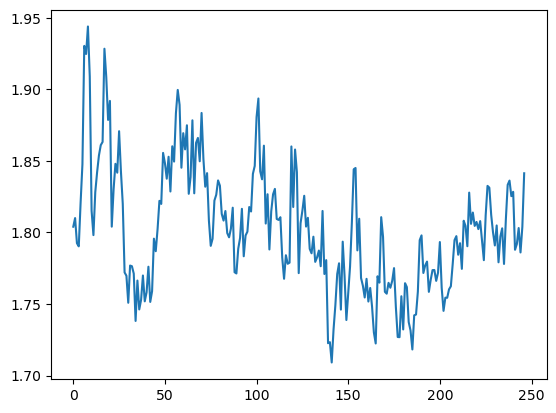

In [286]:
import matplotlib.pyplot as plt
for result_dir in os.listdir(working_dir / 'results'):
    if '52_4_Transformer' in result_dir:
        result_dir_path = working_dir / 'results' / result_dir
        try:
            pai = np.load(result_dir_path / f'pai-t-{percentile}.npy')
            pei = np.load(result_dir_path / f'pei-t-{percentile}.npy')

            mpai = pai.mean(axis=1).squeeze(1)
            plt.plot(range(len(mpai)), mpai)
            break

        except Exception as e:
            print(e)

In [7]:
# Adjaceny to edge index

import numpy as np

a = np.eye(5, k =-1)
a[0,0] =  1

# Conver the above adjacency matrix to edge index format like that in pyTorch Geometric:
def adjacency_to_edge_index(adj_matrix):
    edge_index = np.array(np.nonzero(adj_matrix))
    return edge_index

adjacency_to_edge_index(a)

array([[0, 1, 2, 3, 4],
       [0, 0, 1, 2, 3]])